In [160]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [161]:
#help(nx)


Avg Clustering: 0.3
Density: 0.08888888888888889
Avg Local Efficiency: 0.3
Avg Global Efficiency: 0.08888888888888889


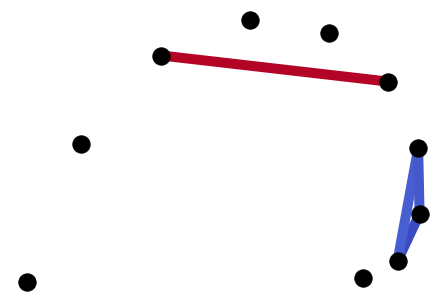

In [162]:
g = nx.Graph()   #nodes
for i in range(0,10):
    g.add_node(i)
    
g.add_edge(1, 2, weight = 0.5)  #edge data
g.add_edge(2, 3, weight=0.9)  
g.add_edge(1, 3, weight = 1)
g.add_edge(4, 7, weight = 12)

edges,weights = zip(*nx.get_edge_attributes(g,'weight').items())

pos = nx.spiral_layout(g)
nx.draw(g, pos, node_color='black', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.coolwarm)
plt.savefig('edges.png')

print("Avg Clustering: " + str(nx.average_clustering(g)))
print("Density: " + str(nx.density(g)))
print("Avg Local Efficiency: " + str(nx.local_efficiency(g)))
print("Avg Global Efficiency: " + str(nx.global_efficiency(g)))



In [163]:
import scipy

In [164]:
from scipy.io import loadmat
data = loadmat('/Users/danielfrees/Downloads/AllROI_Pearsons_T1_thresh0.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A', 'ROInames'])

In [165]:
data['A']
np.shape((data['ROInames']))
np.shape(data['A'])
ROIs = data['ROInames']

ROI_labels = []

for i in range(np.shape(data['ROInames'])[1]):
    ROI_labels.append(ROIs[0][i][0])


#ROI_labels

Avg Clustering: 0.4409700115720011
Density: 0.22949072473787302
Avg Local Efficiency: 0.7182963799273226
Avg Global Efficiency: 0.6107558474478706


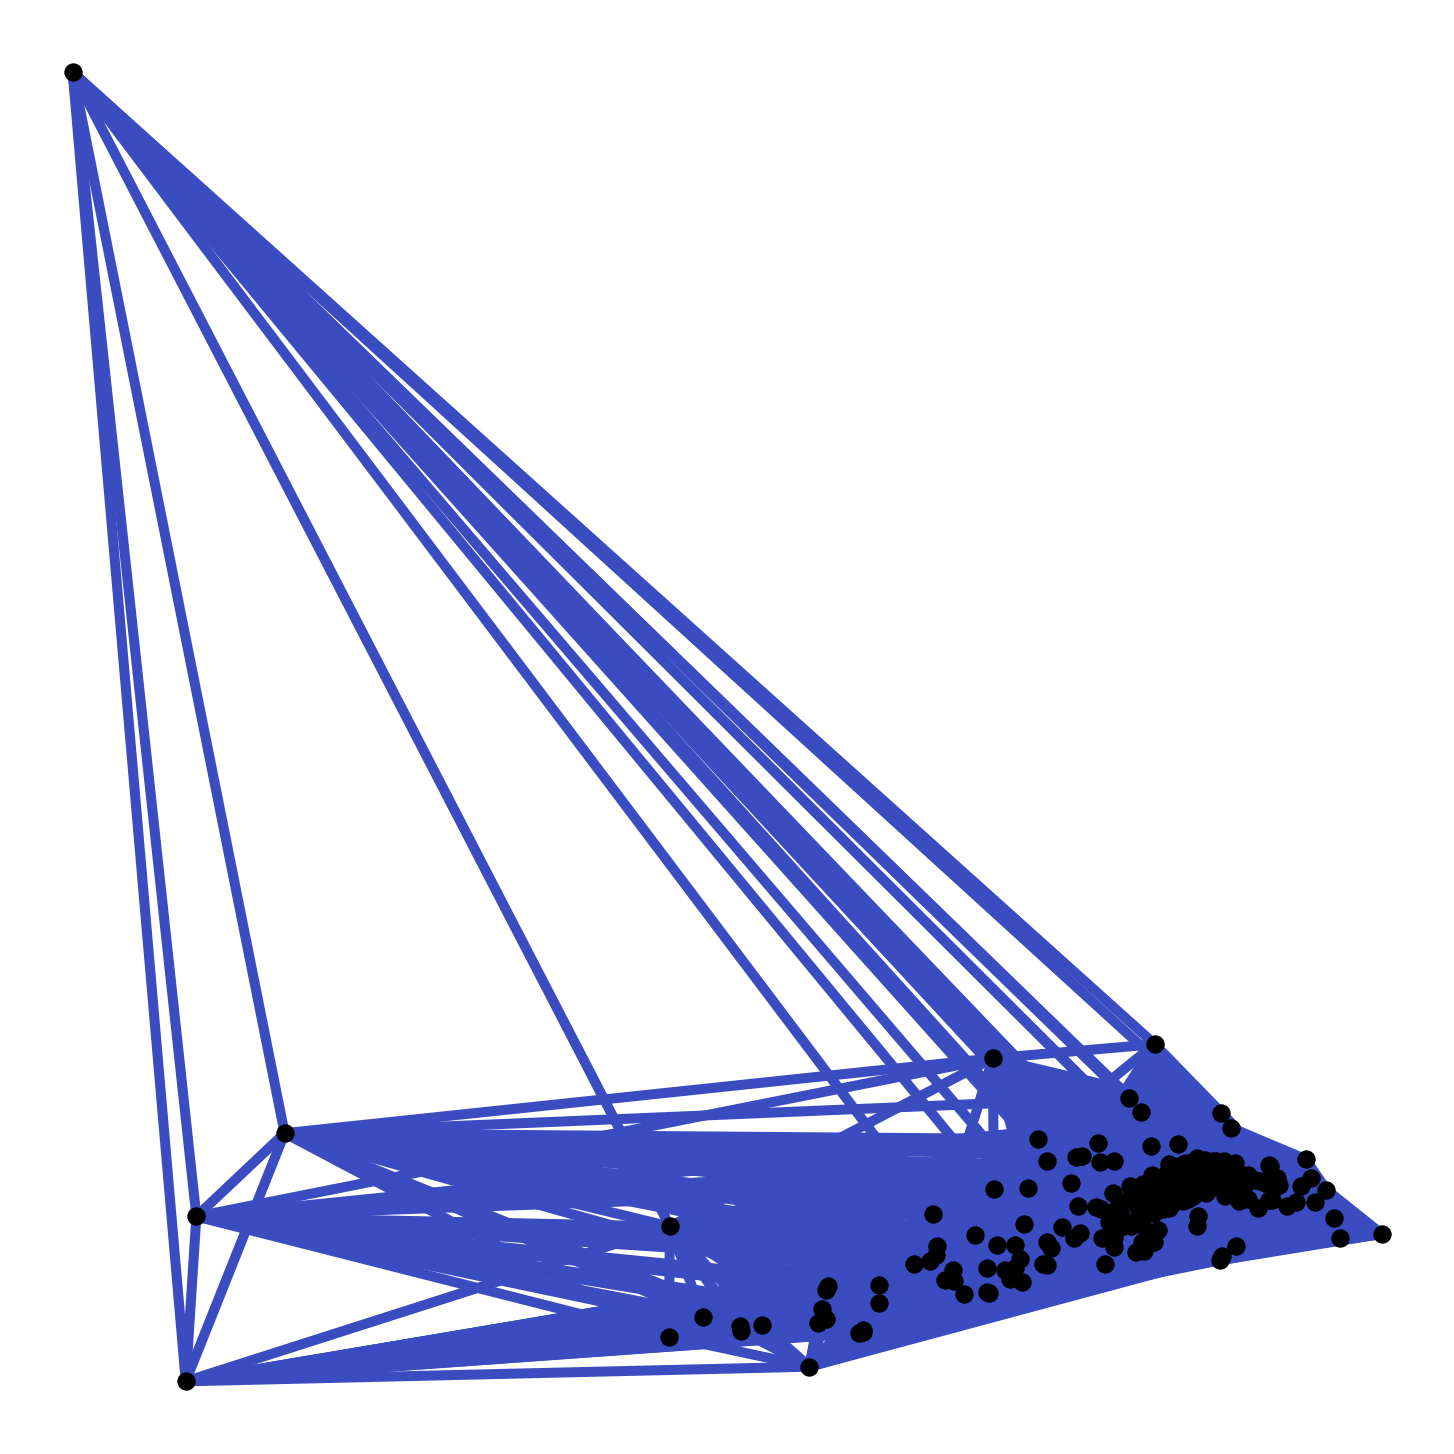

In [166]:
#make graph plots large
matplotlib.rcParams['figure.figsize'] = (20, 20)

mats = []
for i in range(data['A'].shape[-1]):
    patient_conn = pd.DataFrame((data['A'][:,:,i]), columns = ROI_labels, index = ROI_labels)
    patient_conn = patient_conn.filter(regex='264', axis = 1)
    patient_conn = patient_conn.filter(regex='264', axis = 0)
    mats.append(patient_conn)

mats = pd.Series(mats)
mats[0]

p1 = nx.from_pandas_adjacency(mats[0])
p1.name = 'participant_1'

edges,weights = zip(*nx.get_edge_attributes(p1,'weight').items())
pos = nx.spectral_layout(p1)
nx.draw(p1, pos, node_color='black', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.cm.coolwarm)

print("Avg Clustering: " + str(nx.average_clustering(p1)))
print("Density: " + str(nx.density(p1)))
print("Avg Local Efficiency: " + str(nx.local_efficiency(p1)))
print("Avg Global Efficiency: " + str(nx.global_efficiency(p1)))

In [167]:
for i in range(len(mats)):
    p = nx.from_pandas_adjacency(mats[i])
    print("Avg Clustering: " + str(nx.average_clustering(p)))
    print("Density: " + str(nx.density(p)))
    
    #these algorithms are slower:
    #print("Avg Local Efficiency: " + str(nx.local_efficiency(p)))
    #print("Avg Global Efficiency: " + str(nx.global_efficiency(p)))

Avg Clustering: 0.4409700115720011
Density: 0.22949072473787302
Avg Clustering: 0.4631189031800538
Density: 0.25867035372738795
Avg Clustering: 0.5063846087224045
Density: 0.26731190229289087
Avg Clustering: 0.4423983846666911
Density: 0.226494987901832
Avg Clustering: 0.47166163419489404
Density: 0.23562622421938012
Avg Clustering: 0.4734783853619837
Density: 0.24389330568037793
Avg Clustering: 0.4830067093927322
Density: 0.24248185274801246
Avg Clustering: 0.49897840165847146
Density: 0.25875676921304297
Avg Clustering: 0.4560846194734802
Density: 0.22551561239774168
Avg Clustering: 0.46682454161238734
Density: 0.25285171102661597
Avg Clustering: 0.4379228879365688
Density: 0.21454084571955295
Avg Clustering: 0.508990117926599
Density: 0.2679168106924761
Avg Clustering: 0.4595288267416741
Density: 0.24009102431155663
Avg Clustering: 0.4896773776078885
Density: 0.27203594884203247
Avg Clustering: 0.4569841517144396
Density: 0.22128125360064524
Avg Clustering: 0.4698854145998299
Densit